<div class="alert alert-block alert-info">
<h2><center><strong> Participez à la conception d'une voiture autonome :EDA </strong></center></h2>
        
</div>

<div class="alert alert-block alert-success">  
<strong>1.1 Importing des packages<a id='head-1-2'></a> 📕 📗 📘 📙</strong>
        
</div>

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.spatial import distance
import os
import _pickle as cPickle
import matplotlib.pyplot as plt

<div class="alert alert-block alert-danger">  
<h2><center><strong>2.Etude du jeu de données<a id='head-2'></a></strong></center></h2>
        
</div>

<div class="alert alert-block alert-success">  
<strong>2.1 Chargement du jeu de données<a id='head-1-2'></a> 📕 📗 📘 📙</strong>
        
</div>

**Dataset des clicks par session**

In [3]:

li = []
for dirname, _, filenames in os.walk('data/clicks'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        df = pd.read_csv(os.path.join(dirname, filename), index_col=None, header=0)
        li.append(df)

dfClicks = pd.concat(li, axis=0, ignore_index=True)
dfClicks.head(10)

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2
5,2,1506825435299739,1506825435000,2,30970,1506827120575,4,1,17,1,24,2
6,3,1506825442704740,1506825442000,2,236065,1506827536942,4,3,2,1,21,1
7,3,1506825442704740,1506825442000,2,236294,1506827566942,4,3,2,1,21,1
8,4,1506825528135741,1506825528000,2,48915,1506826927593,4,1,17,1,17,1
9,4,1506825528135741,1506825528000,2,44488,1506826957593,4,1,17,1,17,1


In [17]:
users=pd.DataFrame({"user_id":dfClicks['user_id']})
sessions=pd.DataFrame({"session_id":dfClicks['session_id']})

In [21]:
print(f'Il y a {int(users.nunique()):,} utilisateurs unique et {int(sessions.nunique()):,} sessions')

Il y a 322,897 utilisateurs unique et 1,048,594 sessions


Un échantillon : 

In [10]:
dfSample = pd.read_csv('data/clicks_sample.csv', index_col=None, header=0)

**Dataset des metadata pour les articles**

In [6]:
articlesDf = pd.read_csv('data/articles_metadata.csv', index_col=None, header=0)
articlesDf.head()

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


On charge le fichier pickle

In [22]:
with open(r"data/articles_embeddings.pickle", "rb") as input_file:
    e = cPickle.load(input_file)

<div class="alert alert-block alert-success">  
<strong>2.2 Exploration du jeu de données<a id='head-1-2'></a> 📕 📗 📘 📙</strong>
        
</div>

<AxesSubplot:title={'center':'session unique values count'}>

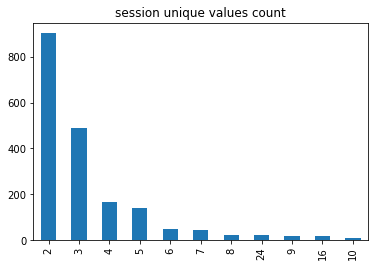

In [23]:
dfSample['session_size'].value_counts().plot(kind = 'bar', title="session unique values count")

<AxesSubplot:title={'center':'articles nb per session'}>

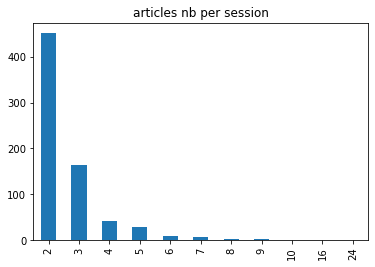

In [24]:
dfSample.groupby(by="session_id")['click_article_id'].nunique().value_counts().plot(kind = 'bar', title="articles nb per session") 

<AxesSubplot:title={'center':'sessions nb per user'}>

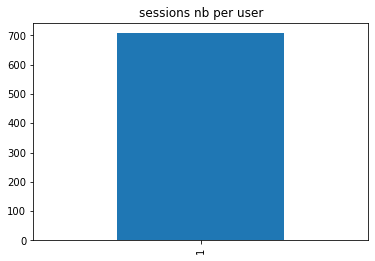

In [25]:
dfSample.groupby(by="user_id")['session_id'].nunique().value_counts().plot(kind = 'bar', title="sessions nb per user")

<AxesSubplot:title={'center':'articles nb per user'}>

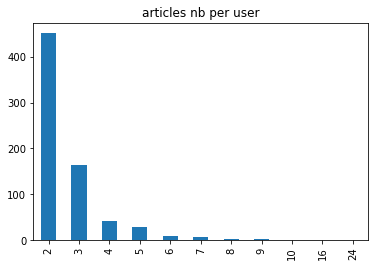

In [26]:
dfSample.groupby(by="user_id")['click_article_id'].nunique().value_counts().plot(kind = 'bar', title="articles nb per user")